<a href="https://colab.research.google.com/github/aimerou/deep-learning/blob/main/notebooks/fruit_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# glob
from glob import glob
# import model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Upload kaggle.json file
from google.colab import files
files.upload()

In [ ]:
# Create directory for kaggle.json file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [58]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir fruits
!unzip fruits.zip -d fruits

In [60]:
!ls fruits/fruits-360

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [61]:
train_dir = 'fruits/fruits-360/Training/'
test_dir =  'fruits/fruits-360/Test/'

In [62]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit

In [63]:
train_fruits = pd.DataFrame(fruits_image, columns=["Fruit Image"])
train_fruits["Fruit"] = fruits

In [64]:
train_fruits

,Fruit Image,Fruit
0,Peach 2/r2_177_100.jpg,Peach 2
1,Peach 2/181_100.jpg,Peach 2
2,Peach 2/r_218_100.jpg,Peach 2
3,Peach 2/56_100.jpg,Peach 2
4,Peach 2/r_219_100.jpg,Peach 2
...,...,...
67687,Redcurrant/r_284_100.jpg,Redcurrant
67688,Redcurrant/r_295_100.jpg,Redcurrant
67689,Redcurrant/90_100.jpg,Redcurrant
67690,Redcurrant/254_100.jpg,Redcurrant


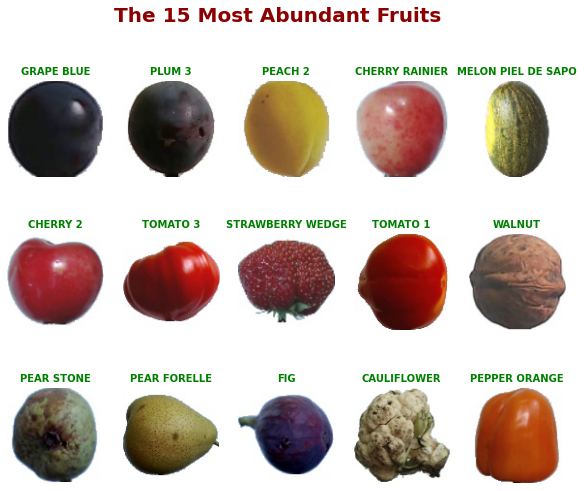

In [65]:
from collections import Counter

# The 15 most frequently found fruits in the dataset
newData = Counter(train_fruits["Fruit"])
most_fruits = newData.most_common(15)
x,y = zip(*most_fruits)
x,y = list(x),list(y)

# Visualize them
plt.figure(figsize=(10,8))
for i in range(15):
    fruits = train_fruits[train_fruits["Fruit"] == x[i]]["Fruit Image"].values[1]
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 10 , fontweight = 600)
    plt.axis("off")
plt.suptitle("The 15 Most Abundant Fruits", fontsize = 20 , color = "darkred", fontweight = 'bold')
plt.show()

In [66]:
img = load_img(train_dir + 'Peach 2/r2_177_100.jpg')
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (100, 100, 3)


In [67]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("Number of fruit classes  -->  ",numberOfClass)

Number of fruit classes  -->   131


In [68]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)       

In [70]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [71]:
epochs =  60  
batch_size = 16

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

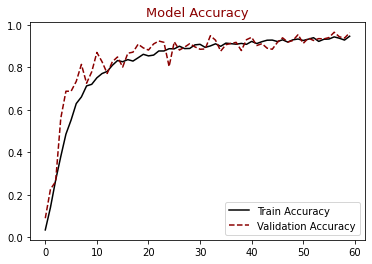

In [73]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

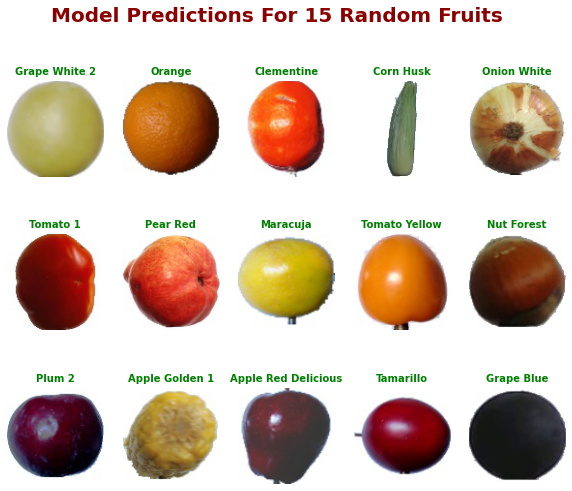

In [75]:
# Choose 15 random image files in test dataset
files = test_generator.filenames
np.random.shuffle(files)
filenames = files[:15]
# Load images and convert them to arrays
images = []
for i in range(15):
  img = load_img(test_dir + filenames[i])
  array = img_to_array(img).reshape(1,100,100,3)
  array /= 255.0
  images.append(array)
# Model predictions
labels = list(train_generator.class_indices.keys())
predictions = []
for i in range(15):
  index = model.predict(images[i]).argmax()
  predictions.append(labels[index])

# Visualize predictions
counter = range(15)
plt.figure(figsize=(10,8))
for filename, prediction, i in zip(filenames,predictions,counter):
    plt.subplot(3,5,i+1)
    img = load_img(test_dir + filename)
    plt.imshow(img)
    plt.title(prediction, color = "green", fontsize = 10 , fontweight = 600)
    plt.axis("off")
plt.suptitle("Model Predictions For 15 Random Fruits", fontsize = 20 , color = "darkred", fontweight = 'bold')
plt.show()